In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Print Dataset
data = pd.read_csv('DMV302_Assessment_2_HouseholdWealth.csv')

print(data)

     household_total_assets  annual_household_income
0                   1230531                    15724
1                   4877446                   124751
2                   4430878                   124372
3                   1954751                   179311
4                   2179963                    56355
..                      ...                      ...
995                 4006949                   253042
996                 3816007                    32384
997                  985874                   196997
998                  482927                    35603
999                   30641                    93254

[1000 rows x 2 columns]


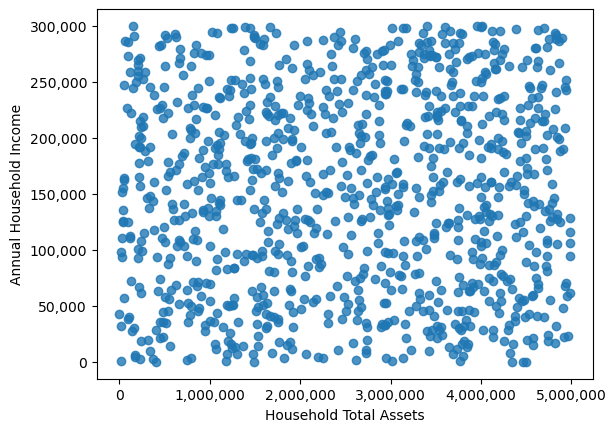

In [2]:
# Import libraries
import matplotlib.ticker as ticker

# Create scatter plot
plt.scatter(data.household_total_assets, data.annual_household_income, alpha=0.8)

# Format the x and y axes with commas for better reading
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set axis labels
plt.xlabel("Household Total Assets")
plt.ylabel("Annual Household Income")

# Show plot
plt.show()


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


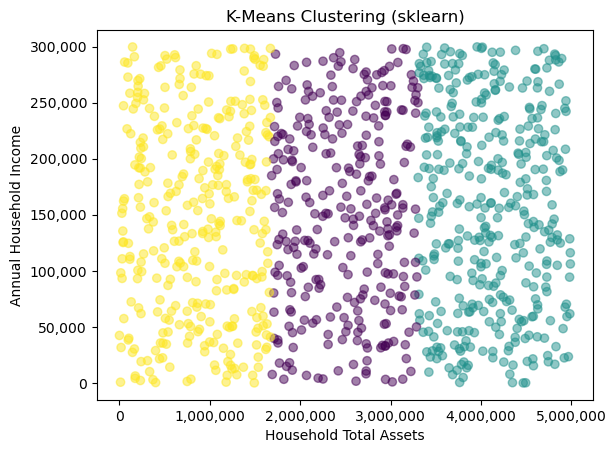

Cluster centers:
 [[2498101.02730375  152771.49829352]
 [4110073.37333333  155496.32533333]
 [ 857386.78915663  147379.93072289]]


In [3]:
# Import libraries
from sklearn.cluster import KMeans

# Select relevant columns for clustering
X = data[['household_total_assets', 'annual_household_income']]

# Initialize KMeans with K=3
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=42)

# Fit the model and predict the clusters
data['cluster'] = kmeans.fit_predict(X)

# Format the x and y axes with commas
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Plot the clusters
plt.scatter(data['household_total_assets'], data['annual_household_income'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Household Total Assets')
plt.ylabel('Annual Household Income')
plt.title('K-Means Clustering (sklearn)')
plt.show()

# Print cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

In [4]:
# Group data by the clusters and print summary information for each cluster
cluster_info = data.groupby('cluster').agg({
    'household_total_assets': ['mean', 'median', 'min', 'max', 'count'],
    'annual_household_income': ['mean', 'median', 'min', 'max', 'count']
})

# Format the cluster information with commas for readability
cluster_info_formatted = cluster_info.applymap(lambda x: f'{int(x):,}' if isinstance(x, (int, float)) else x)
print(cluster_info_formatted)


        household_total_assets                                         \
                          mean     median        min        max count   
cluster                                                                 
0                    2,498,101  2,549,036  1,684,695  3,303,162   293   
1                    4,110,073  4,093,173  3,305,163  4,988,522   375   
2                      857,386    866,920      1,276  1,671,133   332   

        annual_household_income                               
                           mean   median  min      max count  
cluster                                                       
0                       152,771  154,430  955  298,080   293  
1                       155,496  156,565   32  299,648   375  
2                       147,379  146,450   85  299,598   332  


C:\Users\maxpr\AppData\Local\Temp\ipykernel_2148\3248951961.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_info_formatted = cluster_info.applymap(lambda x: f'{int(x):,}' if isinstance(x, (int, float)) else x)


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

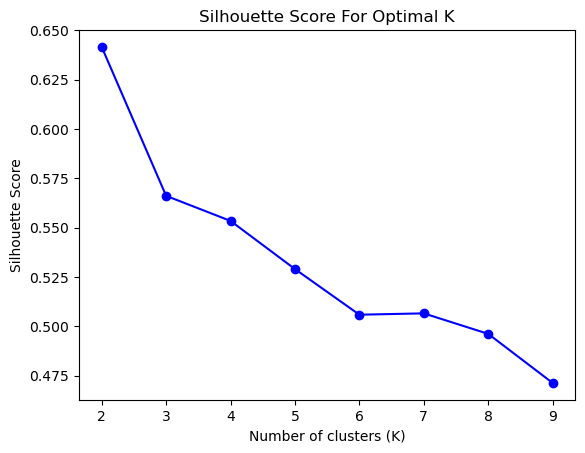

In [5]:
# Import libraries
from sklearn.metrics import silhouette_score

# Initalize array
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.show()


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

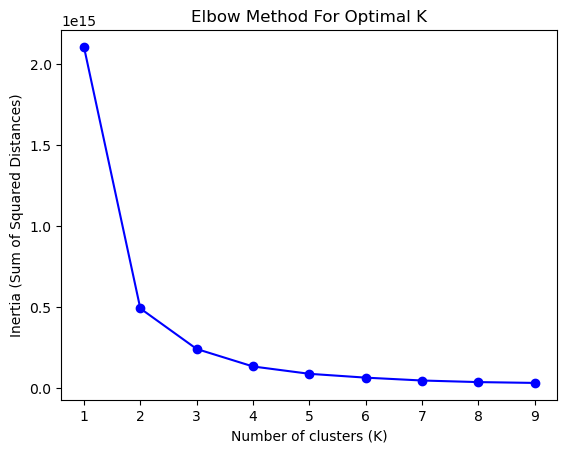

In [6]:
inertia_values = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal K')
plt.show()


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K = 2: Inertia = 493039335348780.38, Dunn Index = 1.0172
K = 3: Inertia = 242797176876917.78, Dunn Index = 0.9542


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K = 4: Inertia = 134843737353058.66, Dunn Index = 0.8782
K = 5: Inertia = 89561166561639.97, Dunn Index = 0.8670


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K = 6: Inertia = 65903491341523.49, Dunn Index = 0.8970
K = 7: Inertia = 48220717080262.42, Dunn Index = 0.8904


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K = 8: Inertia = 38436683803167.35, Dunn Index = 0.7985
K = 9: Inertia = 33332286675331.46, Dunn Index = 0.6346


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K = 10: Inertia = 28357590219113.17, Dunn Index = 0.6429


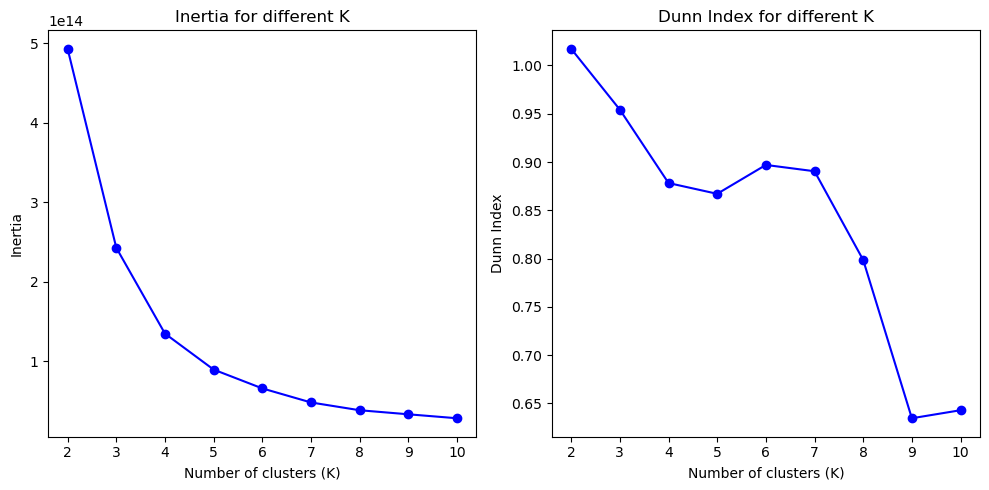

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Function to calculate Dunn Index
def calculate_dunn_index(X, labels, centroids):
    clusters = np.unique(labels)
    
    # Calculate intracluster distances (maximum distance within each cluster)
    max_intra_cluster_dist = 0
    for cluster in clusters:
        points_in_cluster = X[labels == cluster]
        if len(points_in_cluster) > 1:
            intra_distances = pairwise_distances(points_in_cluster)
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_distances))
    
    # Calculate intercluster distances (minimum distance between cluster centroids)
    min_inter_cluster_dist = np.inf
    for i, centroid1 in enumerate(centroids):
        for j, centroid2 in enumerate(centroids):
            if i != j:
                dist = euclidean(centroid1, centroid2)
                if dist < min_inter_cluster_dist:
                    min_inter_cluster_dist = dist
    
    # Dunn index is the ratio of the smallest intercluster distance to the largest intracluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist if max_intra_cluster_dist > 0 else 0


# Define the range for K
K_range = range(2, 11)

# Arrays to store inertia and Dunn index values for each K
inertia_values = []
dunn_indices = []

# Loop over different values of K
for k in K_range:
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    
    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
    # Calculate Dunn index
    dunn_index = calculate_dunn_index(X, labels, centroids)
    dunn_indices.append(dunn_index)
    
    # Print the results for this value of K
    print(f"K = {k}: Inertia = {inertia:.2f}, Dunn Index = {dunn_index:.4f}")

# Plot Inertia for each K
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia for different K')

# Plot Dunn Index for each K
plt.subplot(1, 2, 2)
plt.plot(K_range, dunn_indices, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for different K')

plt.tight_layout()
plt.show()


Running Mini-Batch KMeans:


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


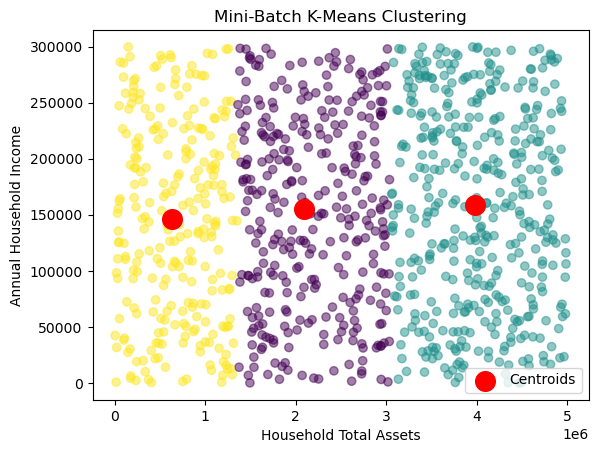

Cluster Centers (Mini-Batch KMeans):
 [[2093705.81838565  155422.13452915]
 [3983111.28387097  158476.41612903]
 [ 625977.72754491  146221.91916168]]

Running Bisecting KMeans:


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


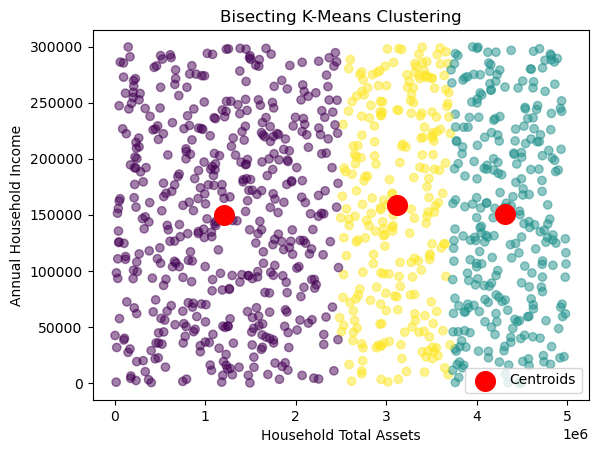

Cluster Centers (Bisecting KMeans):
 [[1203214.7457265   149351.52991453]
 [4314966.72597865  150316.58718861]
 [3116587.16733068  158835.98007968]]


In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
import matplotlib.pyplot as plt
X = data[['household_total_assets', 'annual_household_income']].values

### Mini-Batch KMeans Implementation ###
def run_mini_batch_kmeans(X, k=3):
    # Initialize MiniBatchKMeans
    mini_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, max_iter=300, random_state=42)
    # Fit and predict clusters
    labels = mini_kmeans.fit_predict(X)
    # Get cluster centroids
    centroids = mini_kmeans.cluster_centers_
    
    # Plot the clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
    plt.xlabel('Household Total Assets')
    plt.ylabel('Annual Household Income')
    plt.title('Mini-Batch K-Means Clustering')
    plt.legend()
    plt.show()
    
    print("Cluster Centers (Mini-Batch KMeans):\n", centroids)
    return labels, centroids

# Bisecting KMeans
def bisecting_kmeans(X, num_clusters=3, max_iter=10):
    # Start with one cluster
    clusters = [X]
    labels = np.zeros(len(X), dtype=int)

    # Bisect clusters until we have the desired number of clusters
    while len(clusters) < num_clusters:
        # Find the cluster with the largest number of points to bisect
        largest_cluster_idx = np.argmax([len(cluster) for cluster in clusters])
        largest_cluster = clusters.pop(largest_cluster_idx)

        # Apply KMeans with K=2 to the largest cluster
        kmeans = KMeans(n_clusters=2, max_iter=max_iter, random_state=42)
        sub_labels = kmeans.fit_predict(largest_cluster)
        sub_centroids = kmeans.cluster_centers_

        # Split the largest cluster into two and add them back to the clusters list
        clusters.append(largest_cluster[sub_labels == 0])
        clusters.append(largest_cluster[sub_labels == 1])

        # Update the labels
        labels[np.isin(X, largest_cluster).all(axis=1)] = sub_labels + largest_cluster_idx

    # Calculate final centroids
    centroids = np.array([cluster.mean(axis=0) for cluster in clusters])
    
    # Plot the clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
    plt.xlabel('Household Total Assets')
    plt.ylabel('Annual Household Income')
    plt.title('Bisecting K-Means Clustering')
    plt.legend()
    plt.show()

    print("Cluster Centers (Bisecting KMeans):\n", centroids)
    return labels, centroids

# Running Mini-Batch KMeans
print("Running Mini-Batch KMeans:")
mini_batch_labels, mini_batch_centroids = run_mini_batch_kmeans(X, k=3)

# Running Bisecting KMeans
print("\nRunning Bisecting KMeans:")
bisecting_labels, bisecting_centroids = bisecting_kmeans(X, num_clusters=3)


C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\maxpr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMea

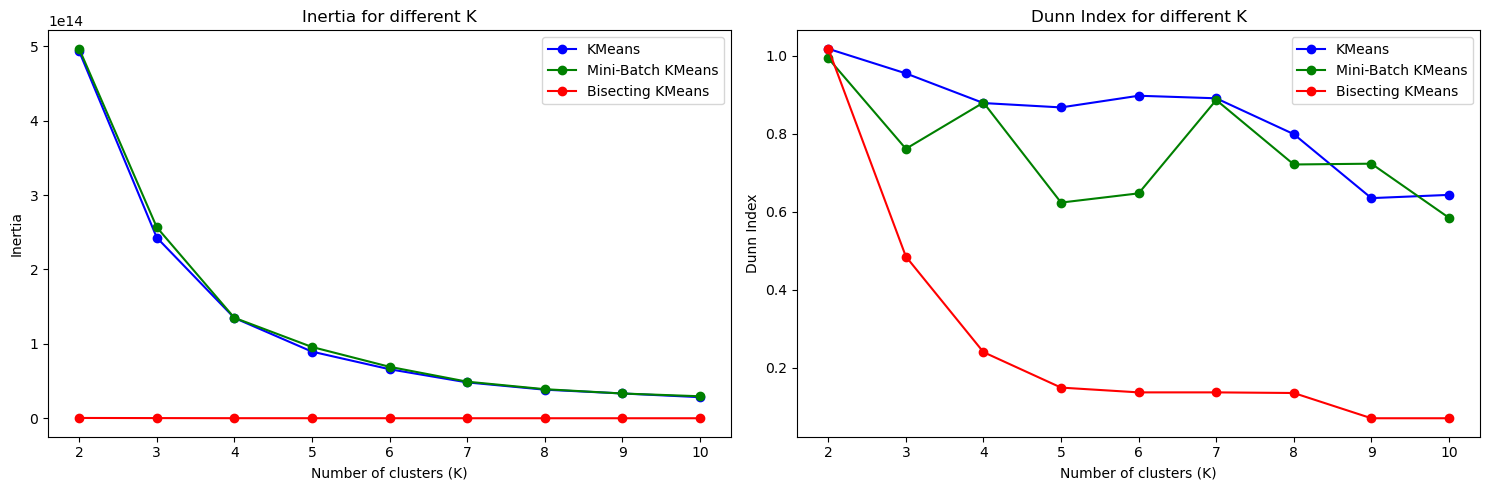

K = 2:
  KMeans -> Inertia: 493039335348780.38, Dunn Index: 1.0172
  Mini-Batch KMeans -> Inertia: 496520561977189.19, Dunn Index: 0.9928
  Bisecting KMeans -> Inertia: 412806765076.00, Dunn Index: 1.0172

K = 3:
  KMeans -> Inertia: 242797176876917.78, Dunn Index: 0.9542
  Mini-Batch KMeans -> Inertia: 256683153623396.38, Dunn Index: 0.7610
  Bisecting KMeans -> Inertia: 242516835592.90, Dunn Index: 0.4848

K = 4:
  KMeans -> Inertia: 134843737353058.67, Dunn Index: 0.8782
  Mini-Batch KMeans -> Inertia: 135038506131348.12, Dunn Index: 0.8794
  Bisecting KMeans -> Inertia: 110796950512.66, Dunn Index: 0.2399

K = 5:
  KMeans -> Inertia: 89561166561639.97, Dunn Index: 0.8670
  Mini-Batch KMeans -> Inertia: 95808796546268.78, Dunn Index: 0.6232
  Bisecting KMeans -> Inertia: 84879299206.65, Dunn Index: 0.1490

K = 6:
  KMeans -> Inertia: 65903491341523.49, Dunn Index: 0.8970
  Mini-Batch KMeans -> Inertia: 69175104317857.39, Dunn Index: 0.6468
  Bisecting KMeans -> Inertia: 64921584729.

In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Function to calculate Dunn Index
def calculate_dunn_index(X, labels, centroids):
    clusters = np.unique(labels)
    
    # Calculate intra-cluster distances (maximum distance within each cluster)
    max_intra_cluster_dist = 0
    for cluster in clusters:
        points_in_cluster = X[labels == cluster]
        if len(points_in_cluster) > 1:
            intra_distances = pairwise_distances(points_in_cluster)
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_distances))
    
    # Calculate intercluster distances (minimum distance between cluster centroids)
    min_inter_cluster_dist = np.inf
    for i, centroid1 in enumerate(centroids):
        for j, centroid2 in enumerate(centroids):
            if i != j:
                dist = euclidean(centroid1, centroid2)
                if dist < min_inter_cluster_dist:
                    min_inter_cluster_dist = dist
    
    # Dunn index is the ratio of the smallest intercluster distance to the largest intracluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist if max_intra_cluster_dist > 0 else 0


# Define the range for K
K_range = range(2, 11)

# Lists to store inertia and Dunn index values for each K
inertia_values_kmeans = []
dunn_indices_kmeans = []
inertia_values_mini_batch = []
dunn_indices_mini_batch = []
inertia_values_bisecting = []
dunn_indices_bisecting = []

# Loop over different values of K for KMeans
for k in K_range:
    # KMeans clustering
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    labels_kmeans = kmeans.fit_predict(X)
    centroids_kmeans = kmeans.cluster_centers_
    
    inertia_values_kmeans.append(kmeans.inertia_)
    dunn_indices_kmeans.append(calculate_dunn_index(X, labels_kmeans, centroids_kmeans))
    
    # Mini-Batch KMeans clustering
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, max_iter=300, random_state=42)
    labels_mini_batch = mini_batch_kmeans.fit_predict(X)
    centroids_mini_batch = mini_batch_kmeans.cluster_centers_
    
    inertia_values_mini_batch.append(mini_batch_kmeans.inertia_)
    dunn_indices_mini_batch.append(calculate_dunn_index(X, labels_mini_batch, centroids_mini_batch))
    
    # Bisecting KMeans clustering
    def bisecting_kmeans(X, num_clusters=3, max_iter=10):
        clusters = [X]
        labels = np.zeros(len(X), dtype=int)

        while len(clusters) < num_clusters:
            largest_cluster_idx = np.argmax([len(cluster) for cluster in clusters])
            largest_cluster = clusters.pop(largest_cluster_idx)

            kmeans = KMeans(n_clusters=2, max_iter=max_iter, random_state=42)
            sub_labels = kmeans.fit_predict(largest_cluster)
            sub_centroids = kmeans.cluster_centers_

            clusters.append(largest_cluster[sub_labels == 0])
            clusters.append(largest_cluster[sub_labels == 1])

            labels[np.isin(X, largest_cluster).all(axis=1)] = sub_labels + largest_cluster_idx

        centroids = np.array([cluster.mean(axis=0) for cluster in clusters])
        return labels, centroids, clusters

    labels_bisecting, centroids_bisecting, clusters_bisecting = bisecting_kmeans(X, num_clusters=k)
    
    # Calculate inertia for Bisecting KMeans
    inertia_bisecting = np.sum([np.sum(pairwise_distances(cluster)) for cluster in clusters_bisecting])
    
    inertia_values_bisecting.append(inertia_bisecting)
    dunn_indices_bisecting.append(calculate_dunn_index(X, labels_bisecting, centroids_bisecting))

# Plot Inertia for each K
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values_kmeans, 'bo-', label='KMeans')
plt.plot(K_range, inertia_values_mini_batch, 'go-', label='Mini-Batch KMeans')
plt.plot(K_range, inertia_values_bisecting, 'ro-', label='Bisecting KMeans')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia for different K')
plt.legend()

# Plot Dunn Index for each K
plt.subplot(1, 2, 2)
plt.plot(K_range, dunn_indices_kmeans, 'bo-', label='KMeans')
plt.plot(K_range, dunn_indices_mini_batch, 'go-', label='Mini-Batch KMeans')
plt.plot(K_range, dunn_indices_bisecting, 'ro-', label='Bisecting KMeans')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for different K')
plt.legend()

plt.tight_layout()
plt.show()

# Print results
for k in K_range:
    print(f"K = {k}:")
    print(f"  KMeans -> Inertia: {inertia_values_kmeans[K_range.index(k)]:.2f}, Dunn Index: {dunn_indices_kmeans[K_range.index(k)]:.4f}")
    print(f"  Mini-Batch KMeans -> Inertia: {inertia_values_mini_batch[K_range.index(k)]:.2f}, Dunn Index: {dunn_indices_mini_batch[K_range.index(k)]:.4f}")
    print(f"  Bisecting KMeans -> Inertia: {inertia_values_bisecting[K_range.index(k)]:.2f}, Dunn Index: {dunn_indices_bisecting[K_range.index(k)]:.4f}")
    print()


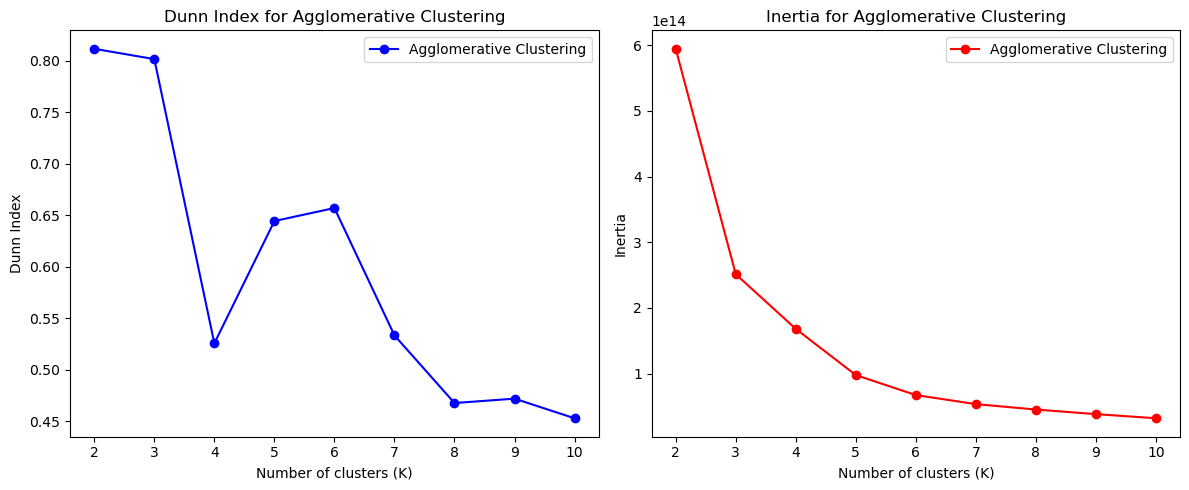

K = 2:
  Agglomerative Clustering -> Dunn Index: 0.8118, Inertia: 594,618,982,414,150.38

K = 3:
  Agglomerative Clustering -> Dunn Index: 0.8018, Inertia: 251,301,329,406,858.06

K = 4:
  Agglomerative Clustering -> Dunn Index: 0.5258, Inertia: 168,077,190,579,853.84

K = 5:
  Agglomerative Clustering -> Dunn Index: 0.6445, Inertia: 97,717,648,453,625.36

K = 6:
  Agglomerative Clustering -> Dunn Index: 0.6572, Inertia: 67,257,466,101,334.36

K = 7:
  Agglomerative Clustering -> Dunn Index: 0.5335, Inertia: 53,440,792,635,133.03

K = 8:
  Agglomerative Clustering -> Dunn Index: 0.4679, Inertia: 45,227,920,836,769.23

K = 9:
  Agglomerative Clustering -> Dunn Index: 0.4721, Inertia: 38,198,429,759,372.27

K = 10:
  Agglomerative Clustering -> Dunn Index: 0.4531, Inertia: 31,952,408,701,749.30



In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Function to calculate Dunn Index
def calculate_dunn_index(X, labels, centroids=None):
    clusters = np.unique(labels)
    
    # Calculate intracluster distances (maximum distance within each cluster)
    max_intra_cluster_dist = 0
    for cluster in clusters:
        points_in_cluster = X[labels == cluster]
        if len(points_in_cluster) > 1:
            intra_distances = pairwise_distances(points_in_cluster)
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_distances))
    
    # Calculate intercluster distances (minimum distance between cluster centroids)
    if centroids is not None:
        min_inter_cluster_dist = np.inf
        for i, centroid1 in enumerate(centroids):
            for j, centroid2 in enumerate(centroids):
                if i != j:
                    dist = euclidean(centroid1, centroid2)
                    if dist < min_inter_cluster_dist:
                        min_inter_cluster_dist = dist
    else:
        min_inter_cluster_dist = np.inf
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.min(pairwise_distances(X[labels == clusters[i]], X[labels == clusters[j]]))
                min_inter_cluster_dist = min(min_inter_cluster_dist, dist)

    # Dunn index is the ratio of the smallest intercluster distance to the largest intracluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist if max_intra_cluster_dist > 0 else 0

# Function to calculate Inertia (Sum of Squared Distances to Centroids)
def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i, centroid in enumerate(centroids):
        points_in_cluster = X[labels == i]
        inertia += np.sum((points_in_cluster - centroid) ** 2)
    return inertia

# Define the range for K
K_range = range(2, 11)

# Lists to store inertia and Dunn index values for Agglomerative Clustering
dunn_indices_agglomerative = []
inertia_agglomerative = []

# Loop over different values of K for Agglomerative Clustering
for k in K_range:
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels_agglomerative = agglomerative.fit_predict(X)
    
    # Centroids are not directly available in Agglomerative Clustering, but can be approximated
    centroids_agglomerative = np.array([X[labels_agglomerative == i].mean(axis=0) for i in np.unique(labels_agglomerative)])
    
    # Calculate Dunn index for Agglomerative Clustering
    dunn_indices_agglomerative.append(calculate_dunn_index(X, labels_agglomerative, centroids_agglomerative))
    
    # Calculate Inertia for Agglomerative Clustering
    inertia_agglomerative.append(calculate_inertia(X, labels_agglomerative, centroids_agglomerative))

# Plot Dunn Index and Inertia for each K
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, dunn_indices_agglomerative, 'bo-', label='Agglomerative Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for Agglomerative Clustering')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(K_range, inertia_agglomerative, 'ro-', label='Agglomerative Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia for Agglomerative Clustering')
plt.legend()

plt.tight_layout()
plt.show()

# Print results for Agglomerative Clustering
for k in K_range:
    print(f"K = {k}:")
    print(f"  Agglomerative Clustering -> Dunn Index: {dunn_indices_agglomerative[K_range.index(k)]:.4f}, Inertia: {inertia_agglomerative[K_range.index(k)]:,.2f}")
    print()


eps=10000, min_samples=2, Dunn Index=0.6780, Inertia=2835513778.6714
eps=20000, min_samples=2, Dunn Index=0.2616, Inertia=66060914819.6214
eps=20000, min_samples=5, Dunn Index=0.8825, Inertia=9347330227.6844
eps=30000, min_samples=2, Dunn Index=0.1336, Inertia=770996782593.7035
eps=30000, min_samples=5, Dunn Index=0.3341, Inertia=134612609645.9246
eps=40000, min_samples=2, Dunn Index=0.0905, Inertia=6544986884394.3486
eps=40000, min_samples=5, Dunn Index=0.0595, Inertia=1895182274060.5417
eps=40000, min_samples=10, Dunn Index=16.2133, Inertia=13558348000.1999
eps=50000, min_samples=2, Dunn Index=0.0302, Inertia=119275573598624.8281
eps=50000, min_samples=5, Dunn Index=0.0215, Inertia=31199527569819.7812
eps=50000, min_samples=10, Dunn Index=0.0807, Inertia=558353978747.1943
eps=60000, min_samples=2, Dunn Index=0.0228, Inertia=476892399086444.8125
eps=60000, min_samples=5, Dunn Index=0.0149, Inertia=269142426632873.1250
eps=60000, min_samples=10, Dunn Index=0.0105, Inertia=5990769874752

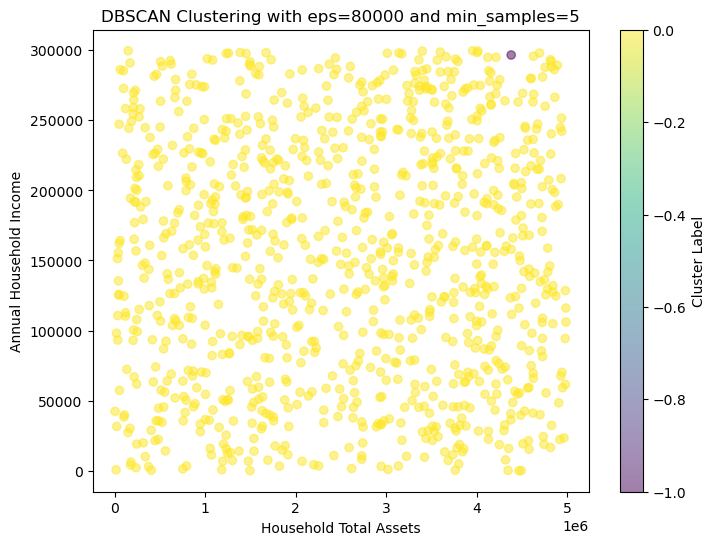

In [11]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Function to calculate Dunn Index
def calculate_dunn_index(X, labels):
    unique_labels = np.unique(labels)
    # Remove noise points
    unique_labels = unique_labels[unique_labels != -1]
    
    # Calculate intra-cluster distances (maximum distance within each cluster)
    max_intra_cluster_dist = 0
    for cluster in unique_labels:
        points_in_cluster = X[labels == cluster]
        if len(points_in_cluster) > 1:
            intra_distances = pairwise_distances(points_in_cluster)
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_distances))
    
    # Calculate intercluster distances (minimum distance between clusters)
    min_inter_cluster_dist = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            dist = np.min(pairwise_distances(X[labels == unique_labels[i]], X[labels == unique_labels[j]]))
            min_inter_cluster_dist = min(min_inter_cluster_dist, dist)
    
    # Dunn index is the ratio of the smallest intercluster distance to the largest intracluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist if max_intra_cluster_dist > 0 else 0

# Function to calculate Inertialike measure
def calculate_inertia(X, labels):
    unique_labels = np.unique(labels)
    unique_labels = unique_labels[unique_labels != -1]  # Remove noise points

    inertia = 0
    for cluster in unique_labels:
        points_in_cluster = X[labels == cluster]
        centroid = np.mean(points_in_cluster, axis=0)  # Calculate centroid of the cluster
        inertia += np.sum(pairwise_distances(points_in_cluster, [centroid])**2)  # Sum of squared distances

    return inertia

# Test different values of eps and min_samples
eps_values = np.arange(50000, 100000, 10000)  # Range of eps values to test
min_samples_values = [2, 5, 10]               # Test with different min_samples

# Store results for different eps and min_samples
best_eps = None
best_min_samples = None
best_dunn_index = -np.inf
best_inertia = np.inf
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Ignore if all points are classified as noise
        if len(np.unique(labels)) <= 1:
            continue
        
        # Calculate Dunn Index
        dunn_index = calculate_dunn_index(X, labels)
        
        # Calculate Inertialike measure
        inertia = calculate_inertia(X, labels)
        
        # Print current parameters, Dunn index, and inertia
        print(f"eps={eps}, min_samples={min_samples}, Dunn Index={dunn_index:.4f}, Inertia={inertia:.4f}")
        
        # Store best parameters based on Dunn Index
        if dunn_index > best_dunn_index:
            best_dunn_index = dunn_index
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels
            best_inertia = inertia  # Store the inertia of the best clustering

# Print the best parameters and corresponding Dunn Index and Inertia
print(f"\nBest Parameters: eps={best_eps}, min_samples={best_min_samples}, Dunn Index={best_dunn_index:.4f}, Inertia={best_inertia:.4f}")

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', alpha=0.5)
plt.title(f"DBSCAN Clustering with eps={best_eps} and min_samples={best_min_samples}")
plt.xlabel("Household Total Assets")
plt.ylabel("Annual Household Income")
plt.colorbar(label="Cluster Label")
plt.show()
